# Bellevue University
## Spring 2022
### DSC 650 : Big Data
### Week 6 : Machine Learning Fundamentals

#### Assignment 6.2b
04/21/2022
##### By: Yograj Karki

Assignment 6.2.b<br>
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocessing
x_train = x_train.astype('float32') # for division
x_test = x_test.astype('float32')
x_train /= 255 # normalise
x_test /= 255


num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
history=model.fit(x_train, y_train, batch_size=32,
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6775 - accuracy: 0.3773 - val_loss: 1.3106 - val_accuracy: 0.5229
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2695 - accuracy: 0.5518 - val_loss: 1.1015 - val_accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1180 - accuracy: 0.6114 - val_loss: 1.0076 - val_accuracy: 0.6541
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0288 - accuracy: 0.6468 - val_loss: 0.9236 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9590 - accuracy: 0.6717 - val_loss: 0.9020 - val_accuracy: 0.6861
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9072 - accuracy: 0.6897 - val_loss: 0.8346 - val_accuracy: 0.7115
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8720 - accuracy: 0.7035 - val_loss: 0.8289 -

In [5]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

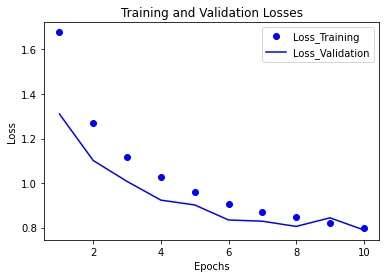

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
plt.plot(epochs, train_loss, 'bo', label='Loss_Training')
plt.plot(epochs, val_loss, 'b', label='Loss_Validation')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.savefig('results/6_2b_lossplot.png')

In [7]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(history.history['accuracy']) + 1)


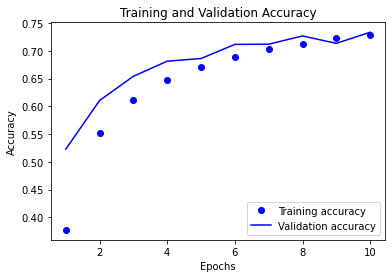

<Figure size 432x288 with 0 Axes>

In [8]:
plt.plot(epochs, train_loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.savefig('results/6_2b_accplot.png')

In [9]:
model.save('results/6_2b_model.h5')

In [10]:
score = model.evaluate(x_test, y_test)

print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.7899 - accuracy: 0.7334
Test accuracy:  0.7333999872207642


In [11]:
import pandas as pd
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=1)

predictions = list(predictions)
actuals = list(y_test)

pred_res = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
pred_res.to_csv('results/6_2b_predictions.csv', index=False)
print (pred_res)

                                                 Actual  Predictions
0     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            3
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...            8
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...            8
3     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            0
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...            6
...                                                 ...          ...
9995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...            3
9996  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            6
9997  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...            5
9998  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            1
9999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...            7

[10000 rows x 2 columns]


In [12]:
#Metrics output
with open('results/6_2b_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(score[0]))
    f.write('\nTest Accuracy: {}'.format(score[1]))